In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 4 notebook

In [2]:
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))

print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))

print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 4A: Dependence of meal termination probability on stomach fullness at bout termination

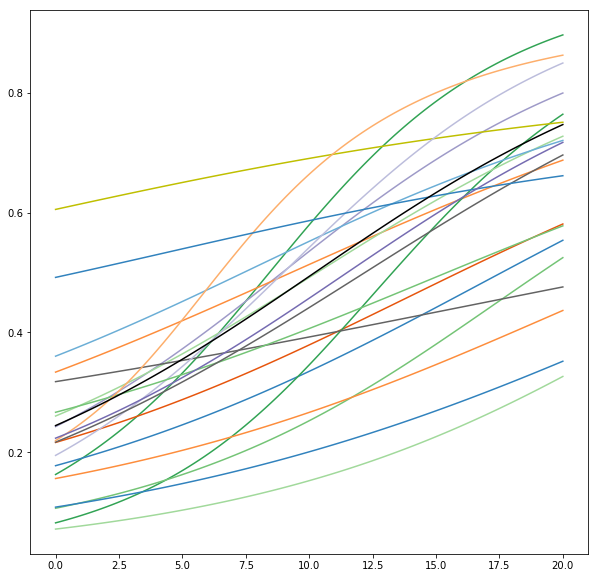

In [3]:
reload(plots)
reload(helpers)

fig, axes = plots.termination_prob(group_dict)

plt.show()

## Figure 4B/C: Individual posterior meal values of stomach dependent and stomach independent meal termination parameters coloured by (B) treatment group and (C) normalised food intake

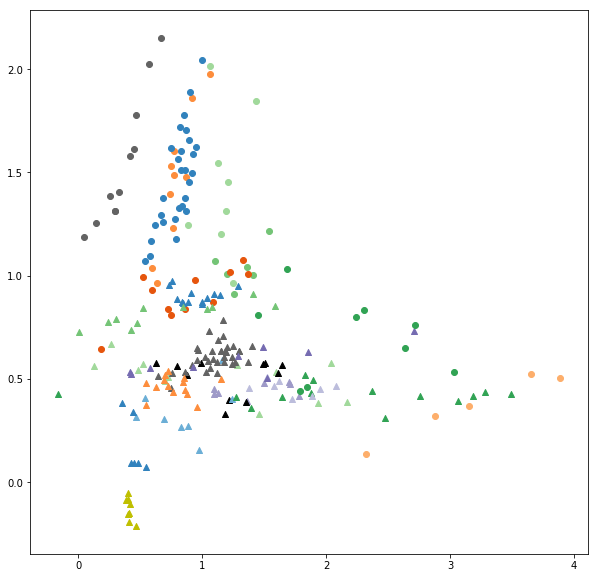

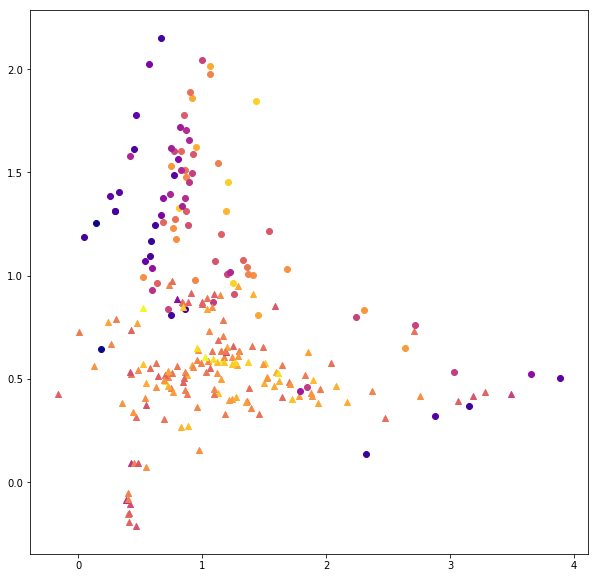

In [4]:
reload(plots)
reload(helpers)

fig, axes = plots.pairplot(df, 'theta4', 'theta5', ctype='drug_c')
fig2, axes2 = plots.pairplot(df, 'theta4', 'theta5', ctype='rate_c')

plt.show()

## Figure 4 D/E: Effect of in silico perturbation of stomach dependent and stomach independent meal termination parameters on normalised feeding rate in fasted and ad-libitum fed rats

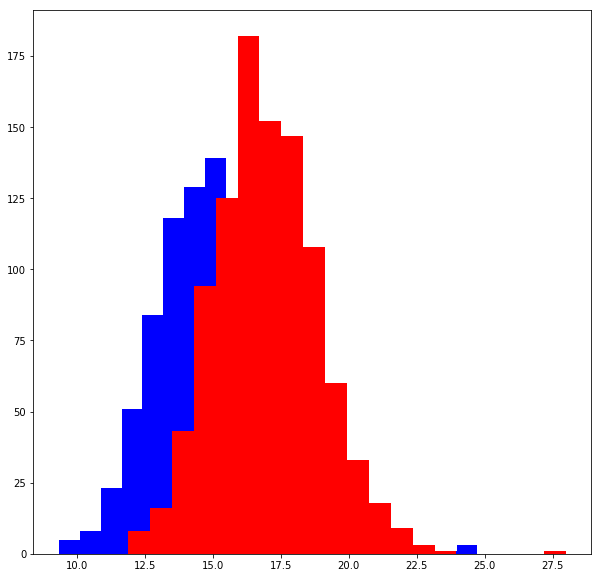

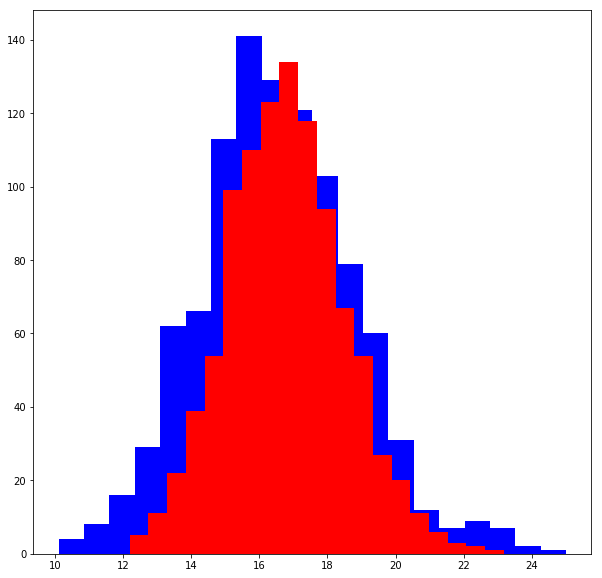

In [5]:
reload(plots)
reload(helpers)

fig, axes = plots.param_change_effect(group_dict,
                                      'saline_0.0_R_D_trace.p',
                                      3, 
                                      3, 
                                      num_samples=1000,
                                      duration=8*60*60)

fig2, axes2 = plots.param_change_effect(group_dict,
                                        'saline_0.0_A_D_trace.p',
                                        3, 
                                        3, 
                                        num_samples=1000,
                                        duration=8*60*60)

plt.show()